In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
mrt_df = pd.read_csv('Data\LTA API\PassengerVolumeByTrainStations\\transport_node_train_202403.csv')

In [3]:
mrt_df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-03,WEEKDAY,11,TRAIN,NS7,21943,15130
1,2024-03,WEEKENDS/HOLIDAY,11,TRAIN,NS7,13062,14512
2,2024-03,WEEKDAY,16,TRAIN,SW4,2124,3233
3,2024-03,WEEKENDS/HOLIDAY,16,TRAIN,SW4,1532,1736
4,2024-03,WEEKENDS/HOLIDAY,10,TRAIN,CC5,1886,2659


In [4]:
mrt_df.describe()

,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,6820.000000,6820.000000,6820.000000
mean,13.339003,12450.874633,12451.175220
std,6.116053,19407.148580,19534.121205
min,0.000000,0.000000,0.000000
25%,9.000000,1850.750000,1959.000000
50%,14.000000,5135.000000,5243.500000
75%,19.000000,14960.000000,14600.500000
max,23.000000,337672.000000,330459.000000


In [5]:
mrt_thomson_ec_df = mrt_df[mrt_df['PT_CODE'].str.contains('TE')].copy()
mrt_thomson_ec_df

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
12,2024-03,WEEKDAY,12,TRAIN,TE16,6611,4702
13,2024-03,WEEKENDS/HOLIDAY,12,TRAIN,TE16,4933,3732
22,2024-03,WEEKDAY,0,TRAIN,DT10/TE11,77,509
23,2024-03,WEEKENDS/HOLIDAY,0,TRAIN,DT10/TE11,40,312
24,2024-03,WEEKDAY,10,TRAIN,EW16/NE3/TE17,25477,36063
...,...,...,...,...,...,...,...
6789,2024-03,WEEKENDS/HOLIDAY,23,TRAIN,TE4,826,925
6804,2024-03,WEEKENDS/HOLIDAY,23,TRAIN,TE5,303,1783
6805,2024-03,WEEKDAY,23,TRAIN,TE5,352,2848
6816,2024-03,WEEKDAY,7,TRAIN,NS27/CE2/TE20,1105,8419


In [6]:
mrt_thomson_ec_df.describe()

,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,800.00000,800.000000,800.000000
mean,13.30000,9526.715000,9866.485000
std,6.15283,17558.759254,18881.560915
min,0.00000,0.000000,0.000000
25%,8.75000,1825.000000,1999.000000
50%,13.50000,3934.000000,3845.500000
75%,18.25000,8278.750000,7938.000000
max,23.00000,150182.000000,195943.000000


In [16]:
mrt_thomson_ec_df_wday = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY']
mrt_thomson_ec_df_wday

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
12,2024-03,WEEKDAY,12,TRAIN,TE16,6611,4702
22,2024-03,WEEKDAY,0,TRAIN,DT10/TE11,77,509
24,2024-03,WEEKDAY,10,TRAIN,EW16/NE3/TE17,25477,36063
30,2024-03,WEEKDAY,0,TRAIN,NS27/CE2/TE20,31,151
56,2024-03,WEEKDAY,22,TRAIN,TE15,6438,3101
...,...,...,...,...,...,...,...
6717,2024-03,WEEKDAY,8,TRAIN,DT10/TE11,21547,11284
6735,2024-03,WEEKDAY,21,TRAIN,EW16/NE3/TE17,31340,13651
6788,2024-03,WEEKDAY,23,TRAIN,TE4,1077,1649
6805,2024-03,WEEKDAY,23,TRAIN,TE5,352,2848


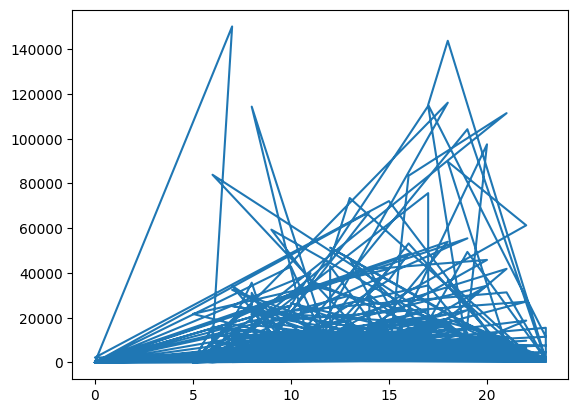

In [15]:
plt.plot(mrt_thomson_ec_df_wday['TIME_PER_HOUR'], mrt_thomson_ec_df_wday['TOTAL_TAP_IN_VOLUME'])